In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import tensorflow as tf

In [40]:
# !unzip -q /content/flower.zip -d /content/dataset

In [41]:
traindatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,      # Rotate images
    width_shift_range=0.2,  # Move images left/right
    height_shift_range=0.2, # Move images up/down
    horizontal_flip=True,   # Flip images
    zoom_range=0.2,         # Zoom in/out
    fill_mode='nearest'
)
testdatagen = ImageDataGenerator(rescale=1./255)





In [42]:
train_root = '/content/dataset/train'
test_root = '/content/dataset/test'
training = traindatagen.flow_from_directory(train_root,batch_size=64,target_size=(224,224))


testing = testdatagen.flow_from_directory(test_root,batch_size=64,target_size=(224,224))

Found 3117 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [43]:
# model = keras.Sequential()

# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
# model.add(layers.MaxPooling2D((2,2)))


# model.add(layers.Conv2D(64,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(128,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Conv2D(256,(3,3),activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(512,activation='relu'))

# model.add(layers.Dropout(0.6))

# model.add(layers.Dense(5,activation='softmax'))



# model = VGG16(weights=None, include_top=True)
# model.load_weights(r'D:\PYTHON\transfer laerning\vgg16\vgg16model.h5')
base_model = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))
base_model.summary()
base_model.trainable = True
for layer in base_model.layers[:-4]: # Keep all layers frozen EXCEPT the last 4
 layer.trainable = False

#telling the program not to train the layters again just use the things it learned to help us predict



#  x = layers.Flatten()(base_model.output)

#  finallayer = layers.Dense(512,activation='relu')(flattenlayer)
#  x = layers.BatchNormalization()(x)

#  dropoutlayer = layers.Dropout(0.4)(finallayer)

#  finallayersoftmax = layers.Dense(5,activation='softmax')(dropoutlayer)
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
output_layer = layers.Dense(5, activation='softmax')(x)




Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model= Model(inputs=base_model.inputs,outputs=output_layer)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam(learning_rate=0.00001)')
history = model.fit(training,validation_data=testing,epochs=60 )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3489 - loss: 1.9380 - val_accuracy: 0.5475 - val_loss: 1.1691
Epoch 2/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6278 - loss: 1.0810 - val_accuracy: 0.6742 - val_loss: 0.8722
Epoch 3/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6728 - loss: 0.9276 - val_accuracy: 0.7483 - val_loss: 0.6765
Epoch 4/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7257 - loss: 0.7834 - val_accuracy: 0.7892 - val_loss: 0.5817
Epoch 5/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7480 - loss: 0.7089 - val_accuracy: 0.8025 - val_loss: 0.5241
Epoch 6/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7935 - loss: 0.6103 - val_accuracy: 0.8175 - val_loss: 0.5052
Epoch 7/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1000ms/step - accuracy: 0.7728 - loss: 0.6455 - val_accuracy: 0.8183 - val_loss: 0.4937
Epoch 8/60
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7992 - loss: 0.5579 - val_accuracy: 0.8275 - val_l

KeyboardInterrupt: 

In [45]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# 1. Re-initialize with GlobalAveragePooling2D
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tuning: Unfreeze Block 5 (last 4 layers)
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

# 2. Build a more robust head
x = layers.GlobalAveragePooling2D()(base_model.output) # Better than Flatten for 90%+
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
final_output = layers.Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=final_output)

# 3. Compile with the specific Fine-Tuning Learning Rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. The "Secret Sauce": Learning Rate Scheduler
# This will automatically drop the learning rate when you hit 88%
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
checkpoint = ModelCheckpoint('best_90plus_model.keras', monitor='val_accuracy', save_best_only=True)

# 5. Resume Training (set to the remaining 25-30 epochs)
history = model.fit(
    training,
    validation_data=testing,
    epochs=30,
    callbacks=[reduce_lr, checkpoint]
)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.3333 - loss: 1.7676 - val_accuracy: 0.5142 - val_loss: 1.4078 - learning_rate: 1.0000e-05
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6132 - loss: 1.0282 - val_accuracy: 0.6650 - val_loss: 1.2103 - learning_rate: 1.0000e-05
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7107 - loss: 0.7916 - val_accuracy: 0.7542 - val_loss: 1.0237 - learning_rate: 1.0000e-05
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7605 - loss: 0.6756 - val_accuracy: 0.7808 - val_loss: 0.8468 - learning_rate: 1.0000e-05
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7557 - loss: 0.6607 - val_accuracy: 0.8083 - val_loss: 0.7003 - learning_rate: 1.0000e-05
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7734 - loss: 0.6047 - val_accuracy: 0.8183 - val_loss: 0.5805 - learning_rate: 1.0000e-05
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 997ms/step - accuracy: 0.7817 - lo

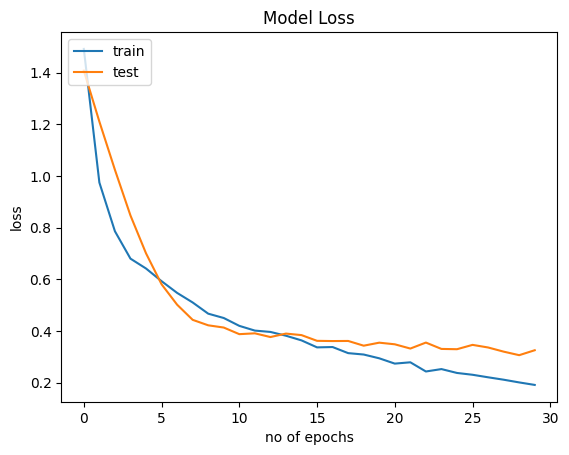

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()


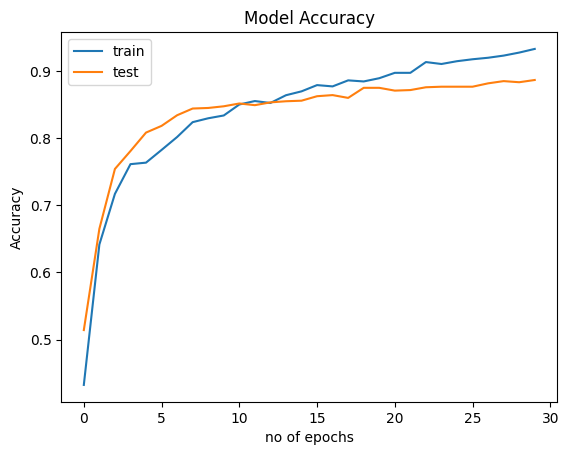

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()


Found 1200 images belonging to 5 classes.
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step


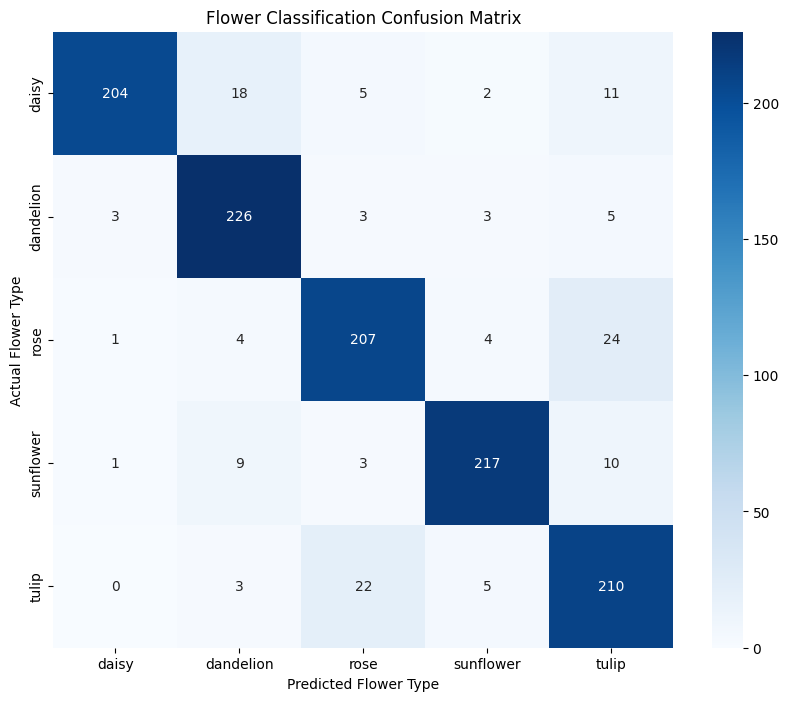

              precision    recall  f1-score   support

       daisy       0.98      0.85      0.91       240
   dandelion       0.87      0.94      0.90       240
        rose       0.86      0.86      0.86       240
   sunflower       0.94      0.90      0.92       240
       tulip       0.81      0.88      0.84       240

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



In [47]:


# 1. Re-load the test data WITHOUT shuffling
# (This ensures the 'True Labels' match the 'Predictions')
test_root = '/content/dataset/test' # Adjust if your path is different
testing_for_matrix = testdatagen.flow_from_directory(
    test_root,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)


Y_pred = model.predict(testing_for_matrix)
y_pred = np.argmax(Y_pred, axis=1) # Convert probabilities to class numbers


cm = confusion_matrix(testing_for_matrix.classes, y_pred)
class_names = list(testing_for_matrix.class_indices.keys())


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Flower Classification Confusion Matrix')
plt.ylabel('Actual Flower Type')
plt.xlabel('Predicted Flower Type')
plt.show()

# 5. Print the text report (Precision, Recall, F1-Score)
print(classification_report(testing_for_matrix.classes, y_pred, target_names=class_names))

In [49]:
model.save('vgg88.keras')